In [25]:
# Libraries

import numpy as np
from scipy.integrate import quad
import scipy.constants as const
import matplotlib.pyplot as plt
import random as rn
from scipy.special import gamma

In [26]:
# Required Values

#kpc = 3.086e+19
kpc = 1

M_sol = 1.9884e30
#M_sol = 1

R_0 = 8.5 * kpc

c = const.c * 1e-3      # in km/s

G = 4.30091e-6 / M_sol

L = 50 * kpc

# Constant
#k = 4.61e-7
m = 4 * np.pi * G / c**2

In [27]:
# Density profiles & Integrals

# Einstein Raidus
def e(x):
    return np.sqrt(4 * G * M_sol * L * x * (1-x) / c**2)

# Densities

# Halo
def rh(x, l):
    rh = 11.41 * kpc
    n= 0.43
    rho_0 = 0.01992e9 * M_sol  / kpc**3
    #rho_0 = 1
    return rho_0 * np.exp(-(l * x / rh)**(1/n))

#Halo with galactic coordinate
def r_co(x, l):
    rho_0 = 0.01992e9 * M_sol  / kpc**3
    rh = 11.41 * kpc
    n= 0.43
    l1 = np.radians(280)
    b1 = np.radians(-33)
    r = np.sqrt(R_0**2 + x**2 * l**2 - 2 * R_0 * x * l * np.cos(l1) * np.cos(b1))
    return rho_0 * np.exp(-(r / rh)**(1/n))
    
# Total Density
def r(x, l):
    return rh(x, l)

# Integral
def int(x, l):
    return  m* l**2 * r(x, l) * x * (1-x)

# Monte Carlo Integration

def monte_carlo_integration(f, a, b, num_samples, l):
    total = 0.0

    for _ in range(num_samples):
        # Generate a random sample within the interval [a, b]
        x = rn.uniform(a, b)
        # Evaluate the function at the random sample
        total += f(x, l)
        
    # Compute the average value of f(x) and scale by the width of the interval
    integral_estimate = (b - a) * (total / num_samples)
    return integral_estimate


l_value = np.arange(8.5, 50, 0.5)

monte = []

for k in l_value:
    l = k * kpc
    
    # Parameters for the integration
    a = R_0 / l
    b = 1
    num_samples = 1000000
    
    integral_estimate = monte_carlo_integration(int, a, b, num_samples, l)
    monte.append(integral_estimate)
    
monte = np.array(monte)
    


In [28]:
# Optical depth
l_value = np.arange(8.5, 50, 0.5)

int_val = []
int_val1 = []

for k in l_value:
    l = k * kpc 
    
    res, error = quad(int, R_0/l, 1, args=(l,))
    result = res
    int_val.append(result)
    
'''
for k in l_value:
    l = k * kpc
    
    result1, error1 = quad(int, R_0/l, 1, args=(l,))
    int_val1.append(result1)
'''

    
int_val = np.array(int_val)
#int_val1 = np.array(int_val1)
    
#print(int_val1)
#print(int_val)



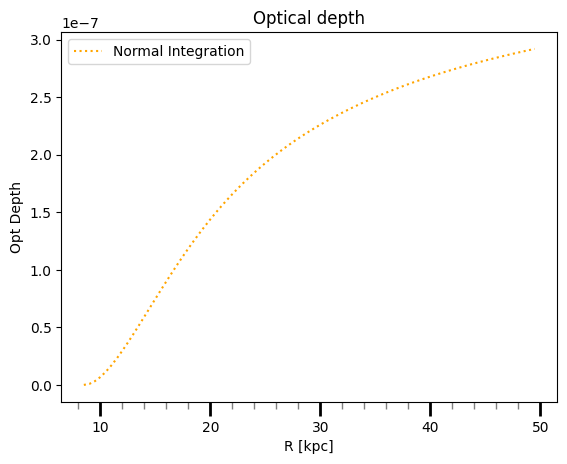

In [29]:
# Create the plot
fig, ax = plt.subplots()

# Plot the data
ax.plot(l_value, int_val, label = 'Normal Integration', color = 'orange', linestyle = ':')
#ax.plot(l_value, int_val1, label = 'Monte Carlo', color = 'green', linestyle = '--')

# Set major ticks locator and format
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Customize the ticks
ax.tick_params(axis='x', which='major', length=10, width=2)
ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray')

# Set labels
ax.set_xlabel('R [kpc]')
ax.set_ylabel('Opt Depth')
ax.set_title('Optical depth')

# Show the grid
ax.grid(False, which='both')
plt.legend()

# Display the plot
plt.show()

In [30]:
# Bulge
def r1(x, l):
    m1 = 1.55e10 * M_sol
    rb = 0.70 * kpc
    return 2 * m1 * rb / (l * x * kpc * (rb + l *x)**3)

# Disk
def r2(x, l):
    m2 = 3.65e10 * M_sol
    l1 = 2.35 * kpc
    H = 0.14 * kpc
    return m2 * np.exp(-l * x / l1) / (l1**2 * H)

# Gas
def r3(x, l):
    m3 = 0.82e10 * M_sol
    rg = 18.14 *  kpc
    zd = 0.52 * kpc
    return m3 * np.exp(-l * x / rg) / (rg**2 * zd)